In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score
from sklearn.preprocessing import LabelEncoder

In [3]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
train = pd.read_csv("application_train.csv")
test = pd.read_csv("application_test.csv")

## Imbalanced class problem

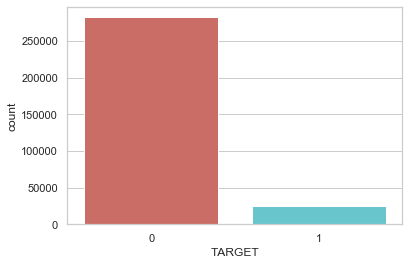

In [9]:
train.TARGET.value_counts()
sns.countplot(x='TARGET', data= train, palette='hls')

In [15]:
count_loan_repaid = len(train[train['TARGET']==0])
count_loan_no_repaid = len(train[train['TARGET']==1])
pct_of_loan_repaid = count_loan_repaid/(count_loan_no_repaid+count_loan_repaid)
print("The loan was repaid in the percentage of ", round(pct_of_loan_repaid*100, 2), '%')
pct_of_loan_no_repaid = count_loan_no_repaid/(count_loan_no_repaid+count_loan_repaid)
print("The loan was not repaid in the percentage of ", round(pct_of_loan_no_repaid*100,2), '%')

The loan was repaid in the percentage of  91.93 %
The loan was not repaid in the percentage of  8.07 %


The plot above shows the we are delaing with an imbalanced class problem, in particular the ratio of repaid-loans to no-repaid-loan is 92:8.

## Missing values

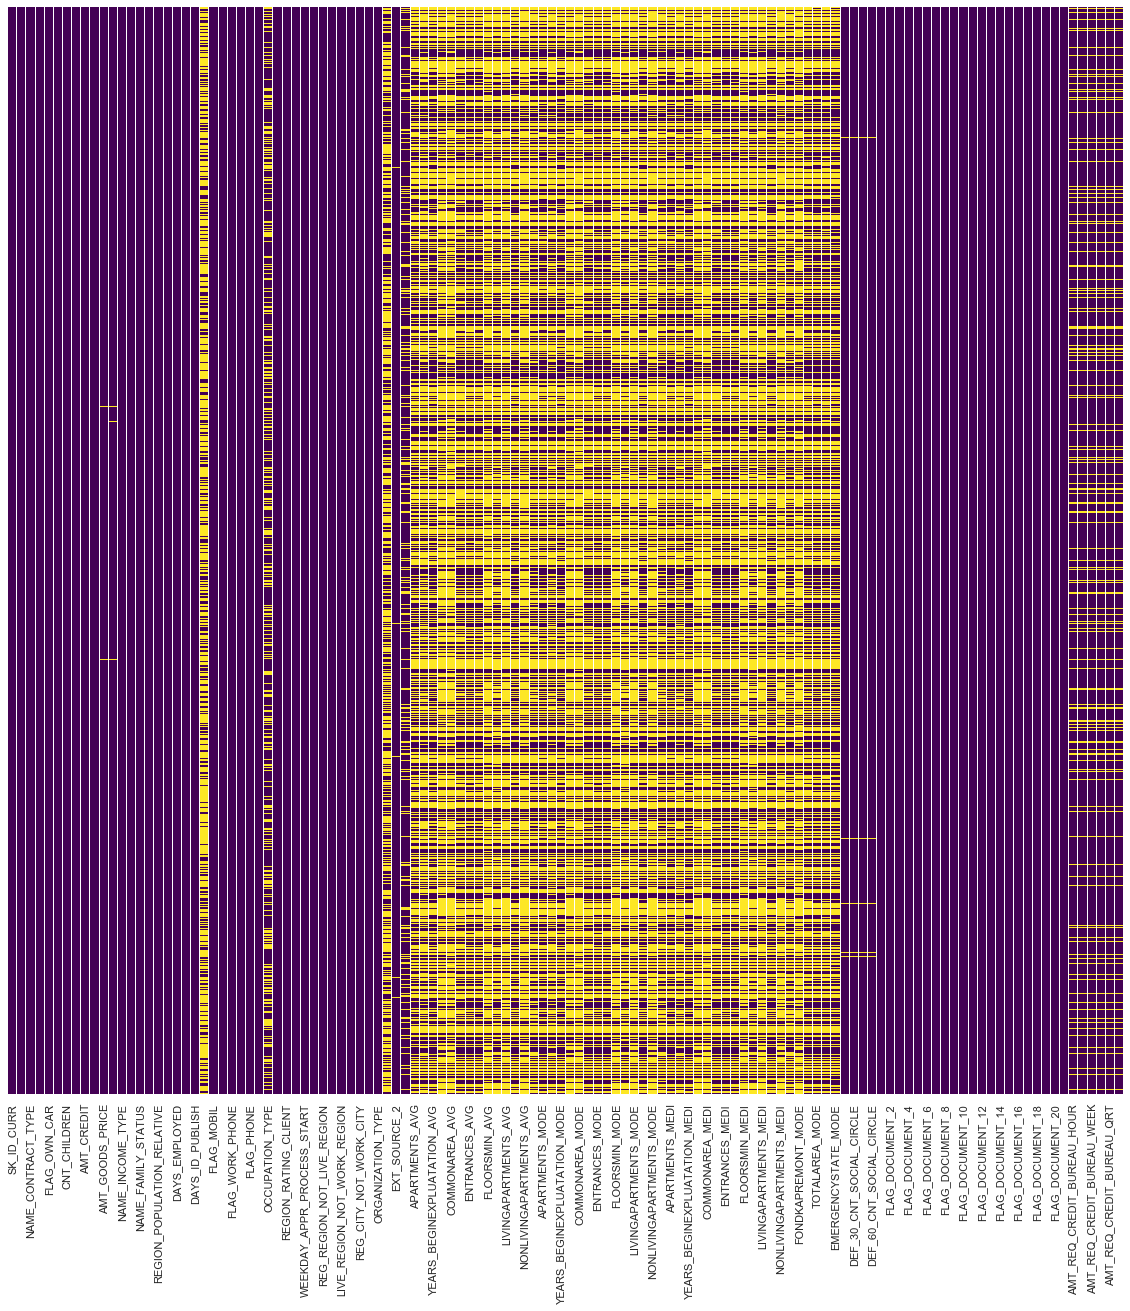

In [18]:
missing_values = train.isnull()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(data = missing_values, yticklabels=False, cbar=False, cmap='viridis', ax=ax)

In [23]:
def summary_missing_values(df):
    mising_values_sum = df.isnull().sum()
    mising_values_percentage = 100 * df.isnull().sum() / len(df)
    summary = pd.concat([mising_values_sum, mising_values_percentage], axis=1)
    summary.columns = ['Number of missing values','Percentage of missing values']    
    return summary.sort_values(by=['Percentage of missing values'], ascending=False)    

In [24]:
table_missing_values = summary_missing_values(train)

In [26]:
table_missing_values.head(20)

,Number of missing values,Percentage of missing values
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


Before building our model, we either have to fill all the missing values or drop the columns with a high percentage of missing values.

## Categorical columns

In [27]:
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

We have to encode all the categorical variables, i.e. columns of 'object' type. We use the Label Encoder method for those having only 2 unique categories, One-Hot encoding for the rest:

In [28]:
# Label Encoder
le = LabelEncoder()
for column in train:
    if train[column].dtype == 'object' and len(list(train[column].unique())) <= 2:
        le.fit(train[column])
        train[column] = le.transform(train[column])
        test[column] = le.transform(test[column])

In [31]:
# One-hot encoding
categorical_variable_list = list(train.select_dtypes(include=['object']).columns)
for column in categorical_variable_list:
    encoded_column = pd.get_dummies(train[column], drop_first=True)
    train = pd.concat([train, encoded_column], axis=1)
    test = pd.concat([test, encoded_column], axis=1)

In [36]:
train.dtypes.value_counts()

uint8      121
float64     65
int64       41
object      13
int32        3
dtype: int64